In [53]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [54]:
# Inizializzazione di K centroidi casuali d'esempio dalla matrice X
def init_rand_centroids(K,X):
    
    m,n = np.shape(X)
    centroids = np.empty((K,n))

    for i in range(K):
        centroids[i] =  X[np.random.choice(range(m))]

    return centroids

In [55]:
# Calcolo della distanza euclidea
def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

In [56]:
# Trova e restituisce l'indice del centroide più vicino di un vettore di X
def closest_centroid(x, centroids, K):
    
    distances = np.empty(K)

    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)

    return np.argmin(distances)

In [57]:
# Restituisce una matrice di indici di cluster per tutti i campioni di dati
def create_clusters(centroids, K, X):
    
    m, _ = np.shape(X)
    cluster_idx = np.empty(m)
    
    for i in range(m):
        cluster_idx[i] = closest_centroid(X[i], centroids, K)
        
    return cluster_idx

In [58]:
# Calcolo della media dei nuovi centroidi dei cluster
def means(cluster_idx, K, X):
   
    _, n = np.shape(X)
    centroids = np.empty((K, n))

    for i in range(K):
        cluster_i_points = X[cluster_idx == i]              # Raggruppa i punti per il cluster 'i'  
        centroids[i] = np.mean(cluster_i_points, axis=0)    # Calcolo media dei punti

    return centroids                         

In [59]:
# Calcolo del K-means e dei cluster finali
def K_means(K, X, max_iterations = 500):
    
    centroids = init_rand_centroids(K, X)
    # print(f"initial centroids: {centroids}")

    # Loop fino a max_iterations o convergenza
    for _ in range(max_iterations):
        
        clusters = create_clusters(centroids, K, X)
        prev_centroids = centroids                          
        
        centroids = means(clusters, K, X)
        
        diff = prev_centroids - centroids

        if not diff.any():
            return clusters, centroids

    return clusters, centroids

# "clusters" conserva l'indice del cluster in cui va il punto
# "centroids" conserva le coordinate dei K centroidi

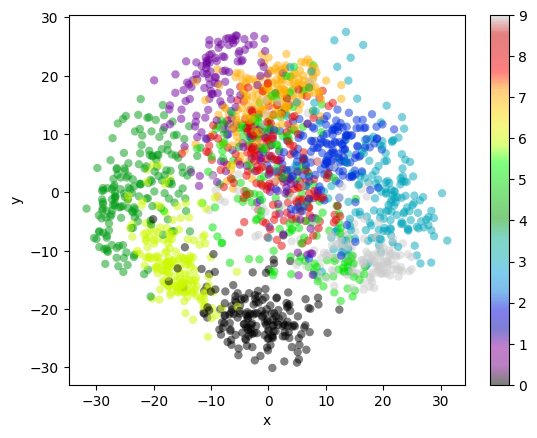

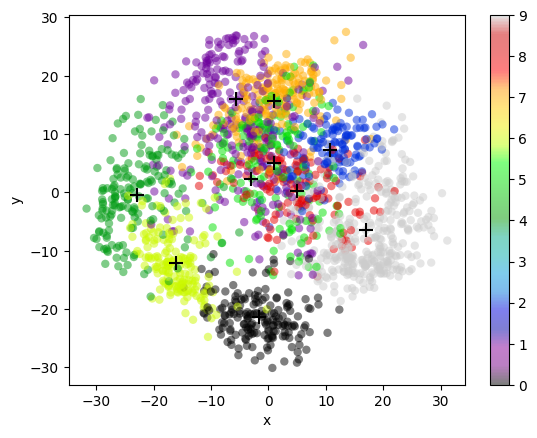

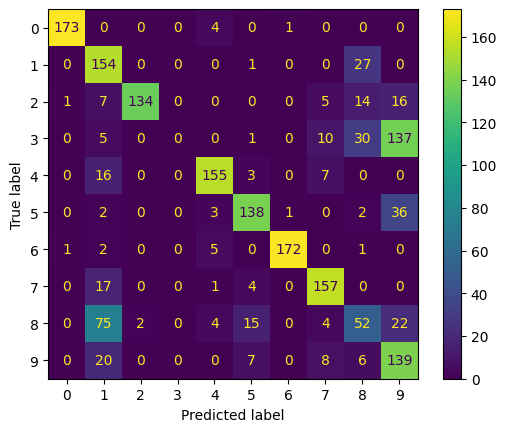

In [60]:
########################
###       MAIN       ###
########################

# loading files & settings
digits = load_digits()
X, Y = digits.data, digits.target

K = 10
n_comp = 6

# PCA applying
X = - PCA(n_comp).fit_transform(X)

plt.scatter(X[:,0], X[:,1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.colormaps["nipy_spectral"])

# PCA plotting
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# K-Means & Cluster applying
clusters, centroids = K_means(K, X, 500)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(Y[mask])[0]


# K-Means & Cluster plotting
plt.scatter(X[:,0], X[:,1], 
            c=labels.astype(int), edgecolor='none', alpha=0.5,
            cmap=plt.colormaps["nipy_spectral"])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(centroids[:,0], centroids[:,1], marker="+", s=100, color="black")

plt.show()

# Confusion-Matrix
ConfusionMatrixDisplay(confusion_matrix(Y, labels)).plot()